Tem 3062 Μαυρουδής Παναγιώτης Εργαστήριο 1

In [3]:
!pip install networkx

  Using cached networkx-3.4.2-py3-none-any.whl.metadata (6.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 1.3 MB/s eta 0:00:00 MB/s eta 0:00:01

[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: pip install --upgrade pip


In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random as rd 
import numpy as np 
import json 
# import pandas as pd 
from IPython.display import display, Math
import sys, os
print(f"Operating in : {os.getcwd()}")
from erg1 import *
erg_inst = Erg1_TemMl(os.getcwd())

Operating in : /home/thinpan/Desktop/24/ml tem/Ask/1erg/project_finals


##### Προσπαθώ οι λύσεις μου να είναι όσο το δυνατό πιο γενικές γίνεται, με καλή οργάνωση κώδικα σε κλάσεις χωρίς όμως να φτάνουμε το overkill. Τα παρακάτω είναι ένα πρόχειρο implementation των συναρτίσεων της βιβλιοθήκης που δημιούργησα. Αυτή μπορεί εύκολα να επεκταθεί και να αποτελεέσει μέρος κάποιας ευρύτερης διαδικασίας μηχανικής μάθησης.

### Example matrix

In [5]:
A = np.random.rand(3, 3)
eigenvalues, eigenvectors = np.linalg.eig(A) 
eigen_dict_oficial = dict.fromkeys(eigenvalues, None)

# Assign corresponding eigenvectors to each eigenvalue
for eigenvalue, eigenvector in zip(eigenvalues, eigenvectors.T):
    eigen_dict_oficial[eigenvalue] = eigenvector
print(f"Οι ιδιοτιμες- ιδιοδιανυσματα της numpy \n : {eigen_dict_oficial}") 
# We probably see some complex eigenvlaues - eigenvectors

Οι ιδιοτιμες- ιδιοδιανυσματα της numpy 
 : {np.complex128(1.754873941186846+0j): array([-0.66190851+0.j, -0.44036133+0.j, -0.60659626+0.j]), np.complex128(0.002659169328495331+0.3164756164954337j): array([ 0.22606048-0.44363458j,  0.62586518+0.j        ,
       -0.48800524+0.34961219j]), np.complex128(0.002659169328495331-0.3164756164954337j): array([ 0.22606048+0.44363458j,  0.62586518-0.j        ,
       -0.48800524-0.34961219j])}


### Δοκιμάζουμε την βιβλιοθήκη mas με έναν τυχαίο πίνακα

In [6]:
# Με την δική μας μέθοδο παρακάτω δεν μπορούμε να προσεγκίσουμε μιγαδικές ιδιο/τιμες/διανύσματα αλλά
# δεν θα χρειαστεί αφού θα την χρησιμοποιήσουμε μόνο για τους ορθοκανονικοποιημένους πίνακες της svd . 
eigen_dict = erg_inst.power_method(A, 3) 
print(f"Οι ιδιοτιμες- ιδιοδιανυσματα της βιβλιοθήκης μας\n : {eigen_dict}") 
# μπορούμε να δούμε πως οι διαφορές είναι μικρές όπου δεν έχουμε μιγαδικούς: 
# diffs = [i-j for i,j in zip()]
# print(diffs) 

__power method__
Οι ιδιοτιμες- ιδιοδιανυσματα της βιβλιοθήκης μας
 : {np.float64(1.7548739411028729): array([0.66190851, 0.44036133, 0.60659626])}


Tριδιαγώνιος triad[−1, 2, −1] με την μέθοδο των δυνάμεων.

In [7]:
for n in range(3,13,2):
    T = erg_inst.generateT(n)  
    # print(T) 
    print('\n',n)  
    eigen_dict = erg_inst.power_method(T)  
    print(eigen_dict)  
    print(2-2*np.cos(n*np.pi/(n+1))) 


 3
__power method__
{np.float64(3.4142135623730945): array([ 0.5       , -0.70710678,  0.5       ])}
3.414213562373095

 5
__power method__
{np.float64(3.732050807568877): array([-0.28867513,  0.5       , -0.57735027,  0.5       , -0.28867514])}
3.7320508075688776

 7
__power method__
{np.float64(3.847759065022574): array([ 0.19134172, -0.35355339,  0.46193977, -0.5       ,  0.46193976,
       -0.35355339,  0.19134171])}
3.8477590650225735

 9
__power method__
{np.float64(3.902113032590307): array([ 0.1381966 , -0.26286555,  0.36180339, -0.4253254 ,  0.4472136 ,
       -0.42532541,  0.3618034 , -0.26286556,  0.1381966 ])}
3.9021130325903073

 11
__power method__
{np.float64(3.931851652578137): array([ 0.10566244, -0.20412415,  0.28867514, -0.3535534 ,  0.39433757,
       -0.40824829,  0.39433756, -0.35355338,  0.28867513, -0.20412414,
        0.10566243])}
3.9318516525781364


In [8]:
T = erg_inst.generateT(5) 
eigen_dict = erg_inst.power_method(T,n_eigonvalues=2) 
eigvals = list(eigen_dict.keys()) 
l1, l2 =  eigvals[0], eigvals[1] 
# print(l1,l2)  
convergence_speed = abs(l2/l1) 
dk1 = 9.558634994633342e-10 
dk2 = 7.714118958135133e-10
print(abs(dk2/dk1) ,convergence_speed) 

__power method__
0.8070314393703907 0.21428853218539867


### Load images on tensors ask4

In [9]:
images_paths = ["/home/thinpan/Desktop/24/ml tem/Ask/1erg/project_finals/input/fotos/python_logo.png",
                "/home/thinpan/Desktop/24/ml tem/Ask/1erg/project_finals/input/fotos/uoc_logo.png"] 
pylogo = erg_inst.load_image_to_matrix(images_paths[0])
uoclogo = erg_inst.load_image_to_matrix(images_paths[1]) 

In [10]:
# distinct the channels of each picture 
def boring_proc(images, names):
    """Epistrefei ta channels ton taniston"""
    Channels = {}
    for i, img_array in enumerate(images):
        red_channel = np.array(img_array[:, :, 0]  )
        green_channel =np.array( img_array[:, :, 1]  )
        blue_channel = np.array(img_array[:, :, 2]  )
        alpha_channel = np.array(img_array[:, :, 3]  ) # όλοι  (203, 601)
        Channels[names[i]] = [red_channel, green_channel, blue_channel, alpha_channel]
    return Channels 
names = ["pylogo","uoclogo"]
images = [pylogo, uoclogo]
Channels = boring_proc(images, names) 
print(Channels["pylogo"][1].shape) 

(203, 601)


### Run SVD on the images using the existing numpy linalg lib

In [11]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from PIL import Image

In [13]:

def compress_image(image_path, num_components):
    """
    Compress an image using PCA.
    :param image_path: Path to the image file.
    :param num_components: Number of principal components to keep.
    :return: Tuple of the compressed image and the reconstruction error.
    """
    # Load image and convert to grayscale for simplicity
    img = Image.open(image_path).convert('L')
    img_data = np.array(img)
    
    # Flatten the image data to 1D per sample (here, pixels)
    original_shape = img_data.shape  # Save original shape
    img_data_flattened = img_data.flatten().reshape(-1, 1).T
    
    # Apply PCA
    pca = PCA(n_components=num_components)
    transformed_data = pca.fit_transform(img_data_flattened)
    
    # Inverse transform to reconstruct the image
    reconstructed_data = pca.inverse_transform(transformed_data)
    reconstructed_image = reconstructed_data.reshape(original_shape)
    
    # Calculate the reconstruction error as the mean squared error
    error = np.mean((img_data - reconstructed_image) ** 2)
    
    return reconstructed_image, error


#### Try the library

__Compress using 20__


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.0921598..1.430554].


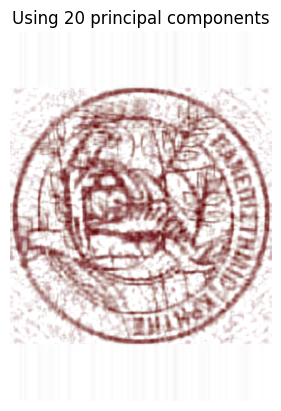

(842, 595, 4) The error is 185.0221710205078


<Figure size 640x480 with 0 Axes>

In [14]:
k_princomps = 20
compressed_Img, error = erg_inst.compress_image(Channels["uoclogo"],k_princomps=k_princomps) 
print(compressed_Img.shape, f"The error is {error}")  
plt.clf() 

__Compress using 30__


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.091429286..1.1333748].


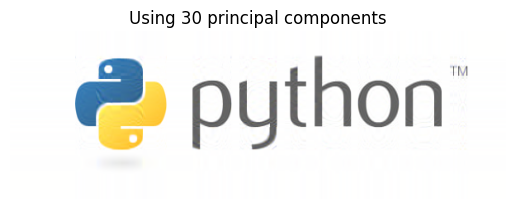

79.09741


<Figure size 640x480 with 0 Axes>

In [16]:
k = 30
compressed_Img, error = erg_inst.compress_image(Channels["pylogo"],k_princomps=k)  
print(error) 

**The Singular Value Decomposition (SVD): Reducing Zeros in Matrix Multiplication**

The full form \( A \mathbf{V} = \mathbf{U} \mathbf{E} \) in equation (2) can have a lot of zeros in \( \mathbf{E} \) when the rank of \( A \) is small and its nullspace is large. Those zeros contribute nothing to matrix multiplication. The heart of the SVD is in the first \( r \) \( \mathbf{v} \)'s, \( \mathbf{u} \)'s, and \( \mathbf{a} \)'s. We can reduce \( A\mathbf{V} = \mathbf{U}\mathbf{E} \) to \( A\mathbf{V}_r = \mathbf{U}_r \mathbf{E}_r \) by removing the parts that are sure to produce zeros. This leaves the reduced SVD.

# Graphs ask2

__createMarkov__
We have a 4*4 matrix.
__Markov created__
__power method__
(1+0j) [ 0.69648307+0.j -0.75521571+0.j -0.75521571-0.j  0.50648562+0.j]


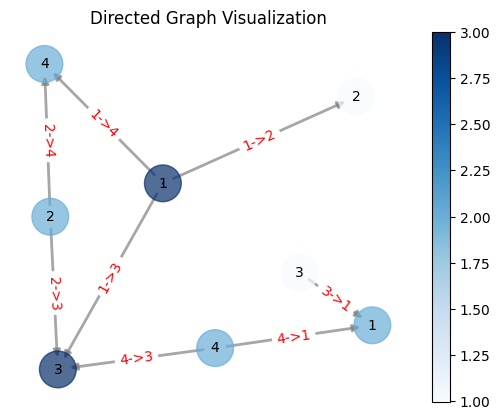

In [17]:
# Try easy data:
graph_data = {
  "1": [2, 3, 4],
  "2": [3, 4],
  "3": [1],
  "4": [1, 3]
}
M = erg_inst.createMarkov(graph_data) 
# print(M) 
n = M.shape[0]
eigen_dict = erg_inst.power_method(M,x0=None,n_eigonvalues=n) 
eigenvalues, eigenvectors = np.linalg.eig(M) 
print(eigenvalues[0], eigenvectors[0])  
# print(eigen_dict) 
erg_inst.make_graph(graph_data) 

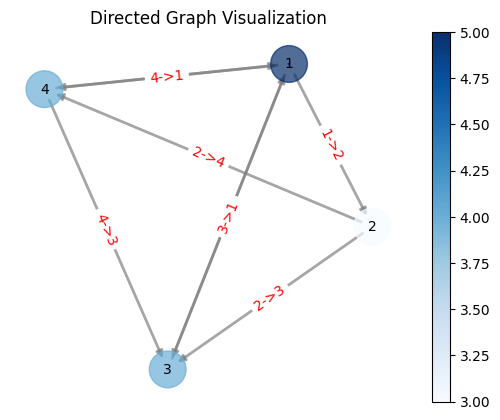

In [24]:
from make_graph import Ploting as plt 

# Example usage
graph_data = {
  "1": [2, 3, 4],
  "2": [3, 4],
  "3": [1],
  "4": [1, 3]
}

plt = plt()
# make_graph(graph_data)
plt.make_node_graph(graph_data)

In [25]:
# Get the indices of the greatest values in descending order
main_eigenvec = eigen_dict[next(iter(eigen_dict))]
indices_of_greatest_values = np.argsort(main_eigenvec)[::-1]
print(indices_of_greatest_values+1) 

[1 3 4 2]


Load the data from the graphs

{'1': [5], '2': [6, 30], '3': [6], '4': [5], '5': [6, 7, 8], '6': [9, 10], '7': [8], '8': [9, 16], '9': [10, 20], '10': [11, 15], '11': [12, 17], '12': [13, 14, 18, 19], '13': [19], '14': [15], '15': [25], '16': [17, 22, 24], '17': [18, 26], '18': [19], '19': [15], '20': [25, 26], '21': [22], '22': [23, 24, 25], '23': [24], '24': [25, 27], '25': [28, 29], '26': [30], '27': [30], '28': [29], '29': [1], '30': [2]}


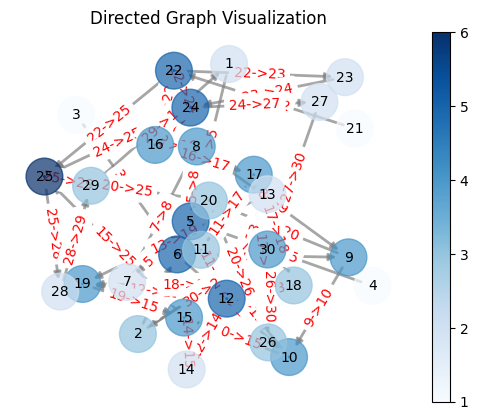

In [27]:
json_graph1 = "/home/thinpan/Desktop/24/ml tem/Ask/1erg/project_finals/input/graphs/graph1.json" 
with open(json_graph1, 'r') as file:
    # Load the JSON content
    graph_data = json.load(file)
print(graph_data)    
plt.make_node_graph(graph_data) 

In [28]:
eig_values, eig_vectors = np.linalg.eig(M)

# Find the index of the maximum eigenvalue
index_of_max_eig = np.argmax(eig_values)

# Retrieve the corresponding eigenvalue and eigenvector
max_eig_value = eig_values[index_of_max_eig]
max_eig_vector = eig_vectors[:, index_of_max_eig]
print(max_eig_vector) 

[0.69648307+0.j 0.26828096+0.j 0.54477802+0.j 0.38230037+0.j]


###  Create Markov 

In [29]:
M = erg_inst.createMarkov(graph_data)
# use numpy  
eig_values, eig_vectors = np.linalg.eig(M)

# Find the index of the maximum eigenvalue
index_of_max_eig = np.argmax(eig_values)

# Retrieve the corresponding eigenvalue and eigenvector
max_eig_value = eig_values[index_of_max_eig]
max_eig_vector = eig_vectors[:, index_of_max_eig]
print(max_eig_vector)

__createMarkov__
We have a 30*30 matrix.
__Markov created__
[0.30085416+0.j 0.27307044+0.j 0.02274814+0.j 0.02274814+0.j
 0.29781009+0.j 0.24251852+0.j 0.10712767+0.j 0.19818618+0.j
 0.21004764+0.j 0.21508876+0.j 0.11416086+0.j 0.07126651+0.j
 0.03789227+0.j 0.03789227+0.j 0.26452246+0.j 0.10697727+0.j
 0.10157673+0.j 0.08106238+0.j 0.13900373+0.j 0.11201839+0.j
 0.02274814+0.j 0.07239428+0.j 0.04325985+0.j 0.11034096+0.j
 0.36260667+0.j 0.11352606+0.j 0.06964305+0.j 0.17685597+0.j
 0.32718355+0.j 0.29449682+0.j]


### Perform power method
#### παιρνουμε τα ίδια αποτελέσματα

In [30]:
eigen_dict = erg_inst.power_method(M) 
print(eigen_dict) 
# Get the indices of the greatest values in descending order
main_eigenvec = eigen_dict[next(iter(eigen_dict))]
indices_of_greatest_values = np.argsort(main_eigenvec)[::-1]
print(indices_of_greatest_values+1) 
# Έχει ενδιαφέρον να παρατηρίσουμε ότι ο συμαντικότερος κόμβος σύμφωνα με τον αλγόριθμο δεν είναι ούτε αυτός με τους περισσότερους συνδέσμους να δείχνουν προς αυτόν
# και ούτε φυσικά αυτός με τα περισσότερα εξερχόμενα links (δεν είναι δηλαδή ούτε η γραμμή ούτε η στήλη με τα περισσότερα στοιχεία στον αντίστοιχο μαρκοβιανό). 

__power method__
{np.float64(1.0000000001971203): array([0.30085416, 0.27307044, 0.02274814, 0.02274814, 0.29781009,
       0.24251852, 0.10712767, 0.19818618, 0.21004764, 0.21508876,
       0.11416086, 0.07126651, 0.03789227, 0.03789227, 0.26452246,
       0.10697727, 0.10157673, 0.08106238, 0.13900373, 0.11201839,
       0.02274814, 0.07239428, 0.04325985, 0.11034096, 0.36260667,
       0.11352607, 0.06964305, 0.17685597, 0.32718355, 0.29449682])}
[25 29  1  5 30  2 15  6 10  9  8 28 19 11 26 20 24  7 16 17 18 22 12 27
 23 14 13 21  3  4]


In [31]:
json_graph2 = "/home/thinpan/Desktop/24/ml tem/Ask/1erg/project_finals/input/graphs/graph2.json" 
with open(json_graph2, 'r') as file:
    # Load the JSON content
    graph_data = json.load(file)
importand_nodes2 = erg_inst.find_important_node(graph_data) 
print(importand_nodes2) 
# erg_inst.make_graph(graph_data)

__createMarkov__
We have a 95*95 matrix.
__Markov created__
__power method__
[80 81 90 70 85 72 88 89 44 45 84 75 74 82 35 33 83 17 15 10 73 65 11 22
 20 25 34 62 69 68 60 67 94 42 14 55 40 87 23 24 30 64 77 13 93 18 79 66
 54 12 91 78 19 50 29  9  6 59 95 26 43 39 76  5 38 28  8 92 41 49 63 37
  7 58  4 27  3 48 57 47 36  2 52 53 32 71 86 46 61 56 51 21 31 16  1]
